In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Final-Assignment/finance_liquor_sales.csv')
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [5]:
# select * from finance_liquor_sales where date  between '2016-01-01' and '2019-12-31'; 

In [7]:
# Aggregate the CSV data so you can an get the most popular item sold based on zip code and percentage of sales per store.

In [9]:
# total = df['sale_dollars'].sum() 
# item_sales = df['sale_dollars'] * df['bottles_sold']
# percentage = (item_sales / total) * 100 

In [13]:
# save the whole process in a new csv file

In [3]:
grouped = df.groupby(['zip_code', 'item_description'])['bottles_sold'].sum().reset_index()
idx = grouped.groupby(['zip_code'])['bottles_sold'].idxmax()
most_popular_items = grouped.loc[idx]
most_popular_items

,zip_code,item_description,bottles_sold
0,50010.0,Member's Mark Spiced Rum,288
1,50022.0,Paramount Triple Sec,4
2,50111.0,Saints N Sinners Apple Pie,108
3,50131.0,Platinum 7x Vodka,48
4,50158.0,Hennessy VS,24
7,50263.0,Jagermeister w/2 Shot Glasses,84
8,50265.0,Kahlua Coffee,72
9,50266.0,Avion Silver w/Powell & Mahoney Margarita Mix,90
11,50314.0,Juarez Triple Sec,240
14,50316.0,Hennessy VS,48


In [7]:
#visualize the data

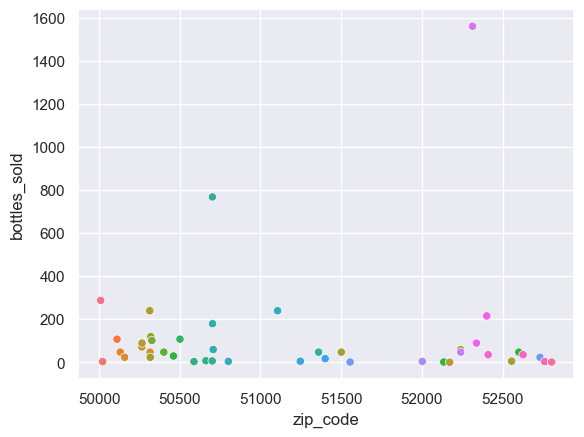

In [24]:
sns.set_theme()
sns.scatterplot(data=most_popular_items,x="zip_code",y="bottles_sold", hue="item_description", legend=False)
plt.savefig('scatterplot.png')

In [31]:
sales_per_store = pd.DataFrame(df.groupby(by=['store_number','store_name']).sum()['sale_dollars']).reset_index()
# sales_per_store['percentage'] = (((df['sale_dollars'] * df['bottles_sold']) / df['sale_dollars'].sum()) * 100).map('{:.2%}'.format) 
sales_per_store['percentage'] = ((df['sale_dollars'] / df['sale_dollars'].sum()) * 100).map('{:.2f}'.format)
sales_per_store.sort_values(by='percentage', ascending=False).reset_index()
# sales_per_store.head()

,index,store_number,store_name,sale_dollars,percentage
0,56,5204,Quik Stop / Burlington,81.60,8.81
1,19,2643,Hy-Vee Wine and Spirits / Waterloo,7.00,7.95
2,30,3705,Liquor Locker,37.50,6.39
3,52,5102,Wilkie Liquors,11620.80,6.06
4,35,4057,Tequila's Liquor Store,413.28,5.50
5,49,4971,Fareway Stores #138 / Pleasant Hill,2295.00,3.75
6,6,2544,Hy-Vee Food Store / Marshalltown,75.54,3.24
7,20,2647,Hy-Vee #7 / Cedar Rapids,486.00,3.07
8,4,2522,Hy-Vee Wine and Spirits / Spirit Lake,324.96,2.87
9,13,2601,Hy-Vee Food Store / Fairfield,21.78,2.79


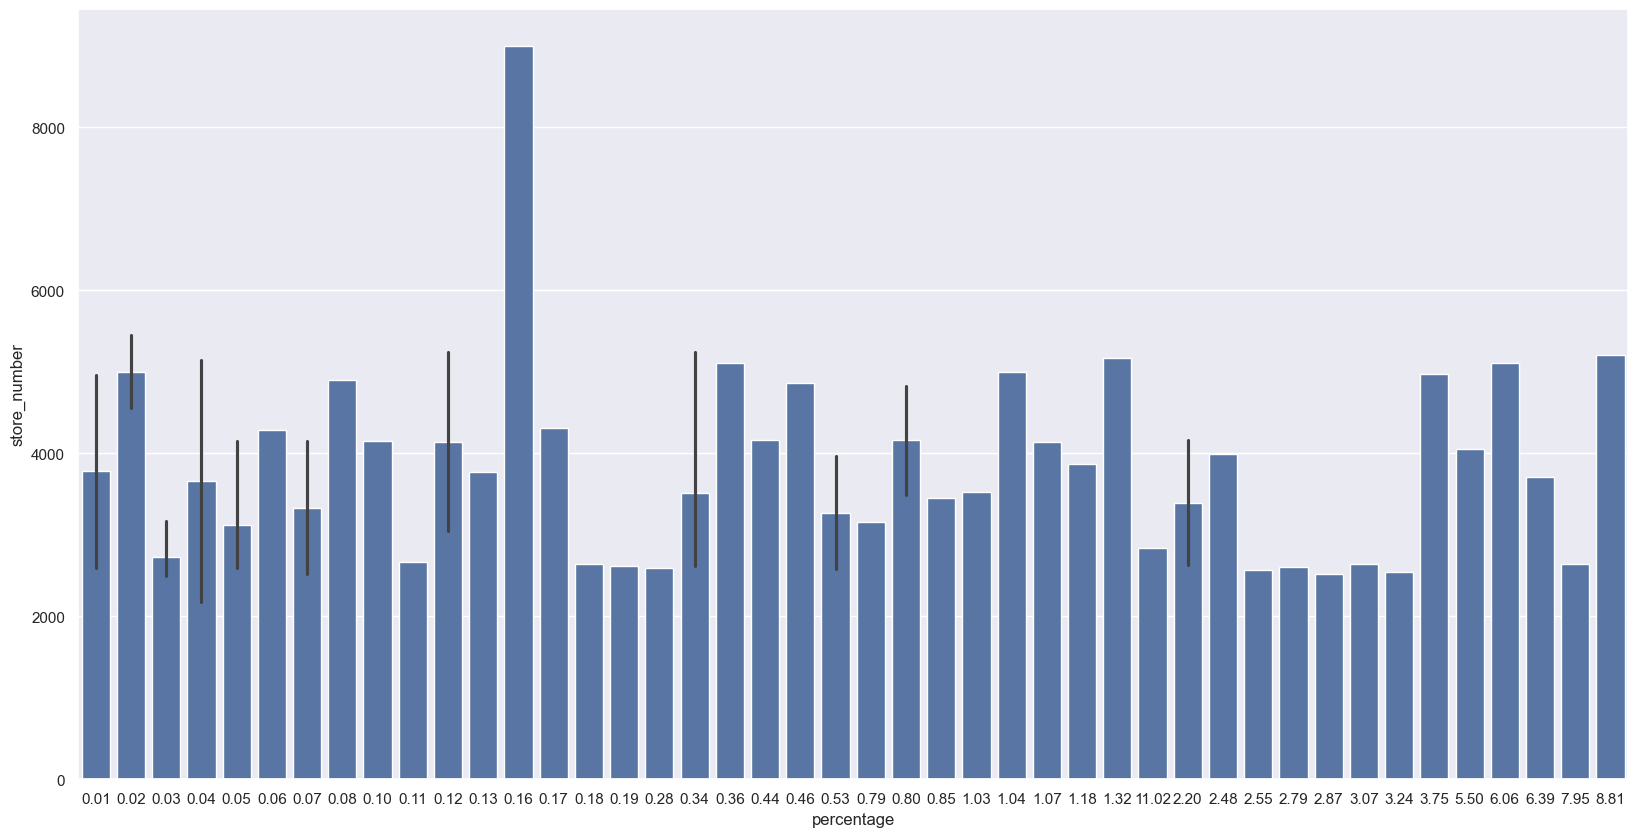

In [27]:
plt.figure(figsize=(20,10))
sns.set_theme(font_scale=1)
sns.set_theme()
sns.color_palette()
ax = sns.barplot(data=sales_per_store.sort_values(by='percentage', ascending=True), x="percentage", y="store_number")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('barplot.png')